Importing Dependencies


In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, accuracy_score, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import pickle
%matplotlib inline


Initializing the Cardiovascular Disease Dataset

In [30]:
cardio_dataset = pd.read_csv('/content/cardio_train.csv')
cardio_dataset.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


#Cleaning  Dataset

In [31]:
cardio_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [32]:
cardio_dataset.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


####Basic Observation-
1. No NaN values in the dataset
2. Coverting age in terms of year
3. Drop id column as it has got no use
4. Make gender Binary (0 to 1 form 1 to 2)
5. Check and drop duplicate values

In [33]:
cardio_dataset.drop(['id'], axis = 1, inplace = True)
cardio_dataset.head()


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [34]:
#Coverting age to years
cardio_dataset['age'] = cardio_dataset['age'].apply(lambda x: x//365.25)
cardio_dataset.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.0,2,168,62.0,110,80,1,1,0,0,1,0
1,55.0,1,156,85.0,140,90,3,1,0,0,1,1
2,51.0,1,165,64.0,130,70,3,1,0,0,0,1
3,48.0,2,169,82.0,150,100,1,1,0,0,1,1
4,47.0,1,156,56.0,100,60,1,1,0,0,0,0


In [35]:
#Gender Transformation:- 1. 0 - women 2. 1 - men
cardio_dataset['gender'] = cardio_dataset['gender'].apply(lambda x: x-1)
cardio_dataset.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.0,1,168,62.0,110,80,1,1,0,0,1,0
1,55.0,0,156,85.0,140,90,3,1,0,0,1,1
2,51.0,0,165,64.0,130,70,3,1,0,0,0,1
3,48.0,1,169,82.0,150,100,1,1,0,0,1,1
4,47.0,0,156,56.0,100,60,1,1,0,0,0,0


In [36]:
#Duplicate Data
cardio_dataset.duplicated().sum()

3186

In [37]:
cardio_dataset.drop_duplicates(inplace = True)

#Basic EDA and Preprocessing of Dataset

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Presence of Cardiovascular Disease')

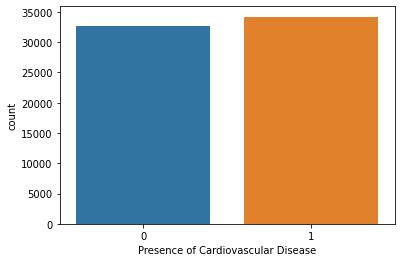

In [38]:
sns.countplot(cardio_dataset.cardio)
plt.xlabel('Presence of Cardiovascular Disease')

The number of positie and negative patients are equal, so dataset is fairly balanced. Now lets see composition gender wise

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


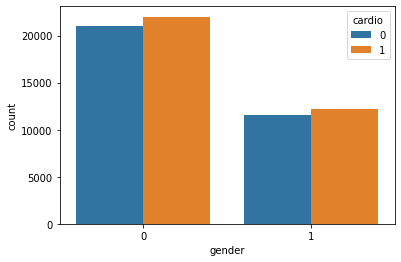

In [39]:
sns.countplot(cardio_dataset.gender, hue = cardio_dataset.cardio)

Number of female patients are more than male patients

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


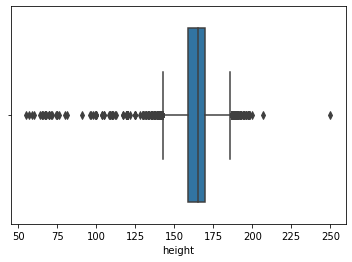

In [40]:
sns.boxplot(cardio_dataset.height)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


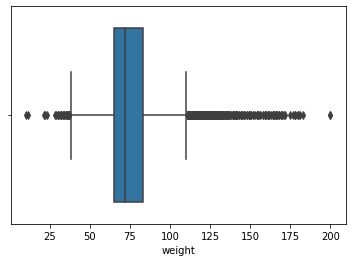

In [41]:
sns.boxplot(cardio_dataset.weight)

There are many outliers in height and weight. So we introduce new feature BMI and remove height and weight

Removing Outliers in weight and height in dataset

In [42]:
cardio_dataset = cardio_dataset[(cardio_dataset['height'] < 250) & (cardio_dataset['weight'] > 20)]

In [43]:
cardio_dataset['bmi'] = (cardio_dataset['weight']/ (cardio_dataset['height']/100)**2).round(1)
cardio_dataset.head()

<ipython-input-43-e963cc24605e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cardio_dataset['bmi'] = (cardio_dataset['weight']/ (cardio_dataset['height']/100)**2).round(1)


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,50.0,1,168,62.0,110,80,1,1,0,0,1,0,22.0
1,55.0,0,156,85.0,140,90,3,1,0,0,1,1,34.9
2,51.0,0,165,64.0,130,70,3,1,0,0,0,1,23.5
3,48.0,1,169,82.0,150,100,1,1,0,0,1,1,28.7
4,47.0,0,156,56.0,100,60,1,1,0,0,0,0,23.0


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


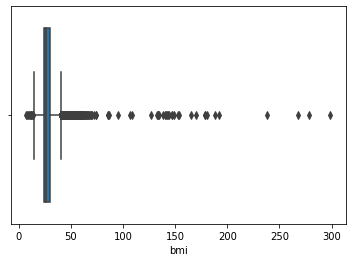

In [44]:
sns.boxplot(cardio_dataset.bmi)

Removing outliers in BMI

In [45]:
cardio_dataset = cardio_dataset[(cardio_dataset['bmi'] > 10) & (cardio_dataset['bmi'] < 100)]

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


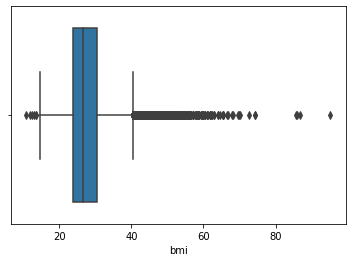

In [46]:
sns.boxplot(cardio_dataset.bmi)

In [47]:
cardio_dataset.drop(['height', 'weight'], axis = 1, inplace = True)
cardio_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66778 entries, 0 to 69999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          66778 non-null  float64
 1   gender       66778 non-null  int64  
 2   ap_hi        66778 non-null  int64  
 3   ap_lo        66778 non-null  int64  
 4   cholesterol  66778 non-null  int64  
 5   gluc         66778 non-null  int64  
 6   smoke        66778 non-null  int64  
 7   alco         66778 non-null  int64  
 8   active       66778 non-null  int64  
 9   cardio       66778 non-null  int64  
 10  bmi          66778 non-null  float64
dtypes: float64(2), int64(9)
memory usage: 6.1 MB


Removing Outliers of abnormal blood pressures

In [48]:
cardio_dataset = cardio_dataset[(cardio_dataset['ap_lo'] > 20) & (cardio_dataset['ap_hi'] > 20)]
cardio_dataset = cardio_dataset[(cardio_dataset['ap_lo'] < 360) & (cardio_dataset['ap_hi'] < 360)]
cardio_dataset = cardio_dataset[cardio_dataset['ap_lo'] < cardio_dataset['ap_hi']]
cardio_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65459 entries, 0 to 69999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          65459 non-null  float64
 1   gender       65459 non-null  int64  
 2   ap_hi        65459 non-null  int64  
 3   ap_lo        65459 non-null  int64  
 4   cholesterol  65459 non-null  int64  
 5   gluc         65459 non-null  int64  
 6   smoke        65459 non-null  int64  
 7   alco         65459 non-null  int64  
 8   active       65459 non-null  int64  
 9   cardio       65459 non-null  int64  
 10  bmi          65459 non-null  float64
dtypes: float64(2), int64(9)
memory usage: 6.0 MB


Making dummies for glucose and cholestrol

In [49]:
cardio_dataset['cholesterol'] = cardio_dataset['cholesterol'].map({1:'normal', 2:'above normal', 3:'well above normal'})
cardio_dataset['gluc'] = cardio_dataset['gluc'].map({1:'normal', 2:'above normal', 3:'well above normal'})
dummies = pd.get_dummies(cardio_dataset[['cholesterol', 'gluc']], drop_first = True)
cardio_dataset = pd.concat([cardio_dataset, dummies], axis = 1)
cardio_dataset.drop(['cholesterol', 'gluc'], axis = 1, inplace = True)
cardio_dataset.head()


,age,gender,ap_hi,ap_lo,smoke,alco,active,cardio,bmi,cholesterol_normal,cholesterol_well above normal,gluc_normal,gluc_well above normal
0,50.0,1,110,80,0,0,1,0,22.0,1,0,1,0
1,55.0,0,140,90,0,0,1,1,34.9,0,1,1,0
2,51.0,0,130,70,0,0,0,1,23.5,0,1,1,0
3,48.0,1,150,100,0,0,1,1,28.7,1,0,1,0
4,47.0,0,100,60,0,0,0,0,23.0,1,0,1,0


Splitting and Standardizing Data

In [50]:
y = cardio_dataset['cardio']
X = cardio_dataset.drop(['cardio'], axis = 1)
scale = ['age', 'ap_hi', 'ap_lo', 'bmi']
scaler = StandardScaler()
X[scale] = scaler.fit_transform(X[scale])
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 7, test_size = 0.2)
X_train.head()

,age,gender,ap_hi,ap_lo,smoke,alco,active,bmi,cholesterol_normal,cholesterol_well above normal,gluc_normal,gluc_well above normal
28303,-2.031036,0,-0.999780,-2.214945,0,1,1,1.848699,1,0,1,0
46467,0.762418,0,1.943003,1.928483,0,0,1,2.147226,0,1,1,0
60047,1.644562,0,0.177333,-0.143231,0,0,1,-0.632809,0,1,1,0
59564,1.350514,0,0.177333,1.928483,0,0,1,-0.185018,1,0,1,0
26839,-2.031036,0,-0.999780,0.892626,0,0,0,-0.296966,1,0,1,0


####Model Creation
Uisng Machine Learning Models

In [23]:
classifiers = {
    'Logistic Regression' : LogisticRegression(),
    'Decision Tree' : DecisionTreeClassifier(),
    'Random Forest' : RandomForestClassifier(),
    'SVM' : SVC(),
    'K-nearest Neighbors' : KNeighborsClassifier(),
    'XGBoost' : XGBClassifier()
}

result = pd.DataFrame(columns = ['Accuracy (%)', 'F1-Score'])

for method, func in  classifiers.items():
  func.fit(X_train, y_train)
  pred = func.predict(X_test)
  result.loc[method] = [100*np.round(accuracy_score(y_test, pred), decimals = 4), round(f1_score(y_test, pred), 2)]
result

,Accuracy (%),F1-Score
Logistic Regression,72.88,0.72
Decision Tree,63.28,0.63
Random Forest,67.85,0.69
SVM,73.24,0.72
K-nearest Neighbors,69.37,0.70
XGBoost,73.53,0.73


Using Neural Network

Splitting training dataset further into validation dataset

In [24]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state = 7, test_size = 0.3)
X_train.head()

,age,gender,ap_hi,ap_lo,smoke,alco,active,bmi,cholesterol_normal,cholesterol_well above normal,gluc_normal,gluc_well above normal
27207,-1.589965,1,-0.411224,-0.143231,0,0,1,-0.632809,1,0,1,0
48724,-1.442941,0,-0.411224,-0.143231,0,0,1,0.318747,1,0,1,0
14481,0.027298,0,-0.411224,-1.179088,0,0,1,-0.670125,1,0,1,0
34400,-0.266749,0,-0.411224,-0.143231,0,0,1,1.158354,1,0,1,0
18597,-0.266749,1,-1.588337,-0.143231,0,0,1,-1.117916,1,0,1,0


In [25]:
model = Sequential()
model.add(Dense(12, activation = 'relu'))
model.add(Dense(50, activation = 'relu', kernel_initializer = tf.random_uniform_initializer(minval = -0.1, maxval = 0.1),
                bias_initializer = tf.random_uniform_initializer(minval = -0.1, maxval = 0.1)))
model.add(Dropout(0.2))
model.add(Dense(50, activation = 'relu', kernel_initializer = tf.random_uniform_initializer(minval = -0.1, maxval = 0.1),
                bias_initializer = tf.random_uniform_initializer(minval = -0.1, maxval = 0.1)))
model.add(Dropout(0.2))
model.add(Dense(50, activation = 'relu', kernel_initializer = tf.random_uniform_initializer(minval = -0.1, maxval = 0.1),
                bias_initializer = tf.random_uniform_initializer(minval = -0.1, maxval = 0.1)))
model.add(Dropout(0.2))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer = 'adam')
early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 5)
model.fit(x = X_train.values, y = y_train.values, validation_data = (X_val, y_val), batch_size = 100, epochs = 150, callbacks = [early_stop])


Epoch 1/150
367/367 [==============================] - 3s 4ms/step - loss: 0.5758 - val_loss: 0.5570
Epoch 2/150
367/367 [==============================] - 1s 4ms/step - loss: 0.5579 - val_loss: 0.5533
Epoch 3/150
367/367 [==============================] - 1s 4ms/step - loss: 0.5536 - val_loss: 0.5518
Epoch 4/150
367/367 [==============================] - 1s 4ms/step - loss: 0.5516 - val_loss: 0.5496
Epoch 5/150
367/367 [==============================] - 1s 4ms/step - loss: 0.5507 - val_loss: 0.5501
Epoch 6/150
367/367 [==============================] - 1s 4ms/step - loss: 0.5491 - val_loss: 0.5495
Epoch 7/150
367/367 [==============================] - 1s 4ms/step - loss: 0.5486 - val_loss: 0.5503
Epoch 8/150
367/367 [==============================] - 1s 4ms/step - loss: 0.5488 - val_loss: 0.5497
Epoch 9/150
367/367 [==============================] - 1s 4ms/step - loss: 0.5490 - val_loss: 0.5481
Epoch 10/150
367/367 [==============================] - 1s 4ms/step - loss: 0.5480 - val_lo

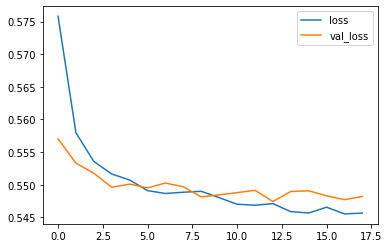

In [26]:
losses = pd.DataFrame(model.history.history)
losses[['loss', 'val_loss']].plot()

In [27]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

410/410 [==============================] - 1s 1ms/step


In [28]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.70      0.78      0.74      6381
           1       0.77      0.68      0.72      6711

    accuracy                           0.73     13092
   macro avg       0.73      0.73      0.73     13092
weighted avg       0.74      0.73      0.73     13092



Saving the Model

In [52]:
pickle.dump(model, open('cardio_model.sav', 'wb'))